# Ejercicios OpenSource con sklearn.datasets


##Regresión lineal al dataset  load_boston


###Librerias necesarias


In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

### cargamos los datos de la biblioteca scikit-learn


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

###Conociendo los datos que tiene el dataset

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


*   datos/data: contiene la información de varias casas
*   feature_names: nombres de las características
*   DESCR: describe el conjunto de datos
*   **objetivo/traget: los precios de la casa (caracterista más relevante)**
---

Conociendo las caracteristicas que tienen los datos:

In [ ]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

*   CRIM: Tasa de delincuencia per cápita por ciudad
*   ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
*   INDUS: Proporción de acres comerciales no minoristas por ciudad
*   CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
*   NOX: concentración de óxido nítrico (partes por 10 millones)
*   RM: Número medio de habitaciones por vivienda
*   EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD: Índice de accesibilidad a carreteras radiales
*   TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
*   PTRATIO: Proporción alumno/profesor por municipio
*   B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
*   LSTAT: porcentaje de la población de menor estatus
*   MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 

### Creamos una tabla de datos usando **pandas** 
(facilita el manejo de los datos)

In [ ]:
#creamos una tabla (tipo excel con PANDAS, con titulos para faciliar la manipulación)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)   #imprimimos las primeras 10 filas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Podemos ver que el valor de destino falta en los datos. 
Creamos una nueva columna de valores de destino y la agregamos a la tabla la llamamos **MEDV**

In [ ]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


###Conociendo los datos

In [ ]:
#Cuantos registros tiene el dataset (rows)
#boston.shape[1]
#boston.index
#Cuántos datos tiene cada registro (columns)
#boston.shape[1]
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()
#boston.isnull().values.any()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Graficando los valores
reviseos la estimación de la densidad del kernel de los valores de las casas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


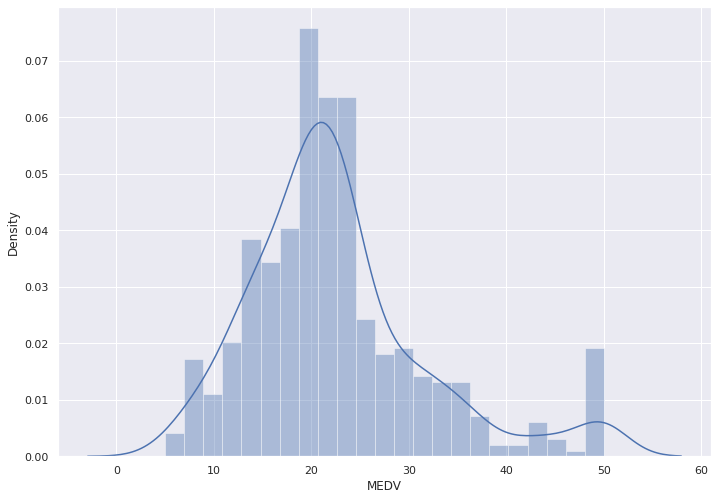

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(boston['MEDV'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico

###matriz de correlación 
para medir las relaciones lineales entre las variables y de esa forma determinar que valores son más practicos para entregar un modelo de regresión lineal.

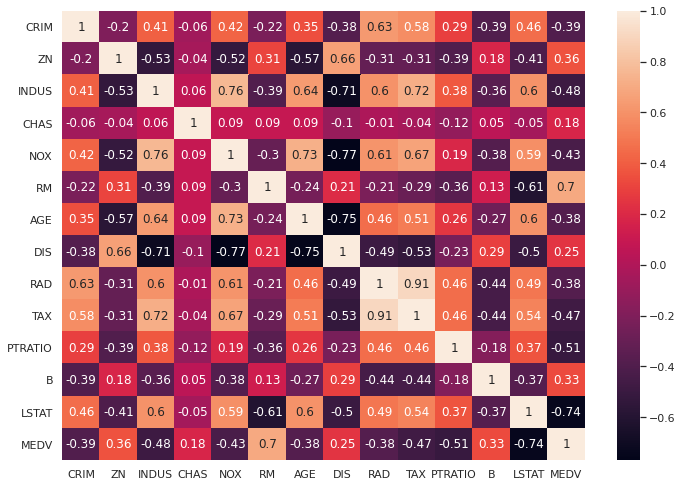

In [ ]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

Se deben seleccionar aquellas características que tienen una alta correlación (ya se positiva o negativa) con nuestra variable de destino (MEDV). 

Entre 0.7 a 0.74 sea positivo o negativo:
MEDV 	<->	RM
MEDV	<->	LSTAT
Se deben descartar las características que tengan multi-colinealidad (correlación utópica que solo se podría dar en laboratorio), son aquellas que tengan valores superiores 0,74:
RAD<->TAX 
DIS<->AGE

Usaremos un gráfico de dispersión para ver cómo estas características varían 

RM vs MEDV
LSTAT vs MEDV


### Graficando variables descartadas

si no creemos en tablas, pues generemos graficas de comparación entre variables y a ojo descartamos

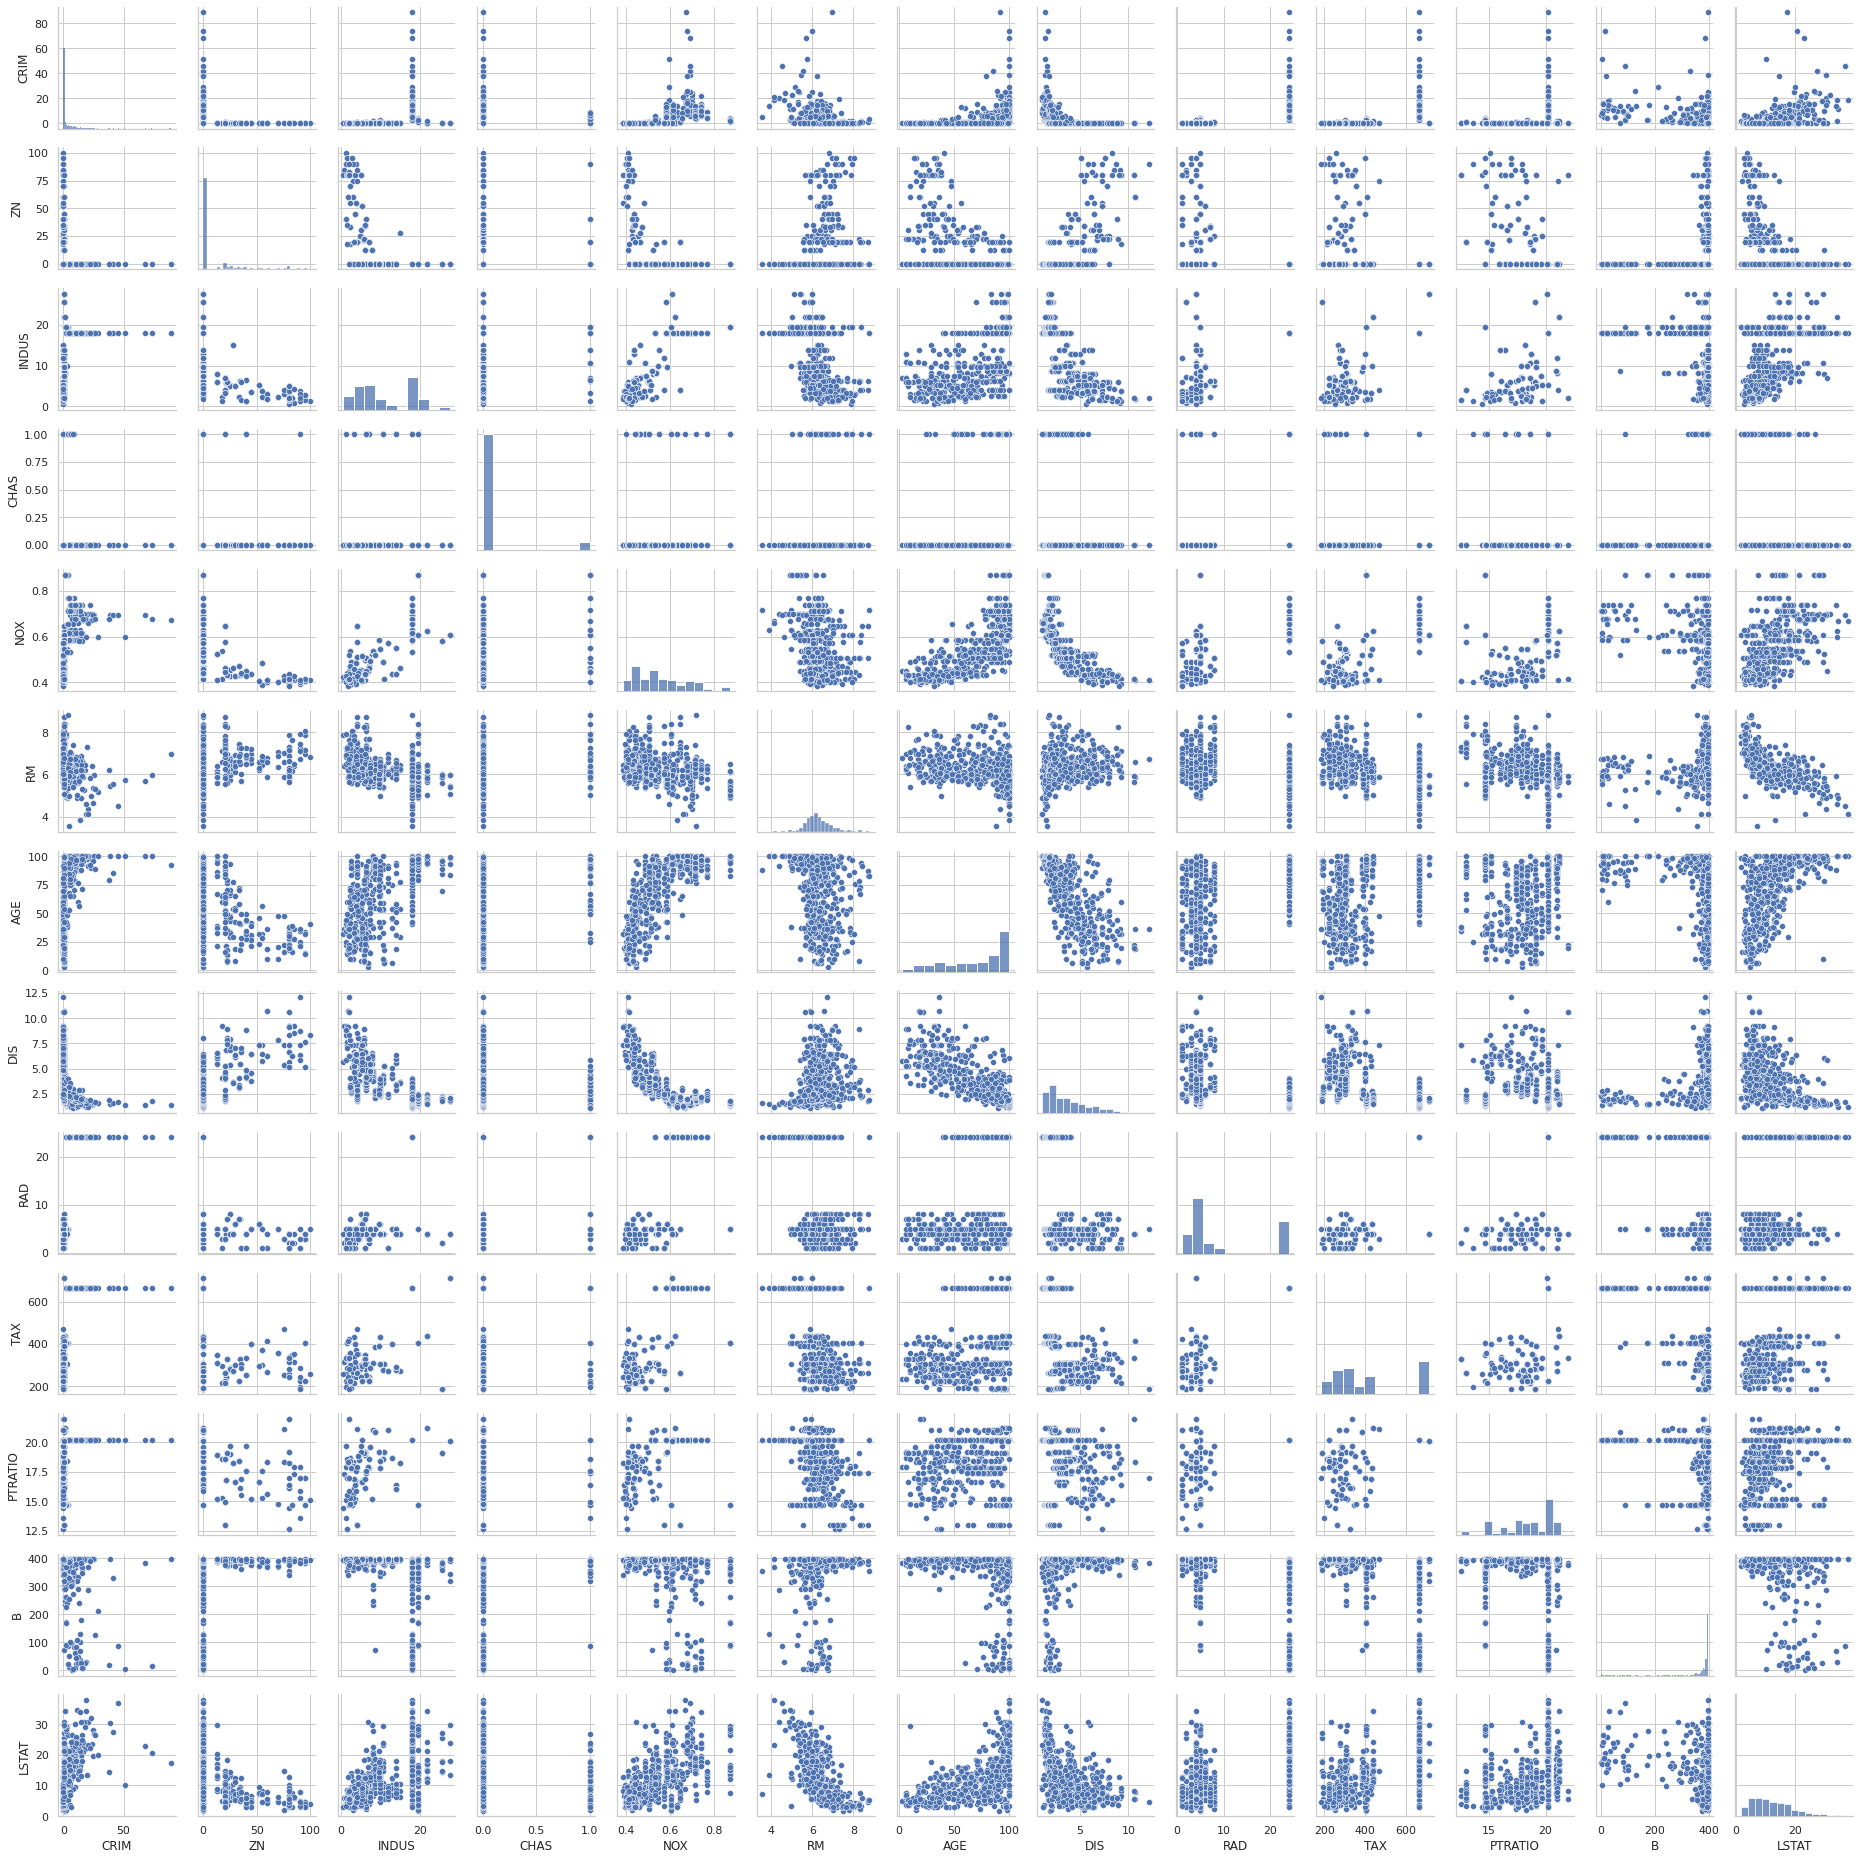

In [ ]:
sns.set(style='whitegrid', context='notebook')
features_plot = boston_dataset.feature_names
sns.pairplot(boston[features_plot], height=2.0);
plt.tight_layout()
plt.show()

###Graficando variables descartadas

###MEDV VS CRIM

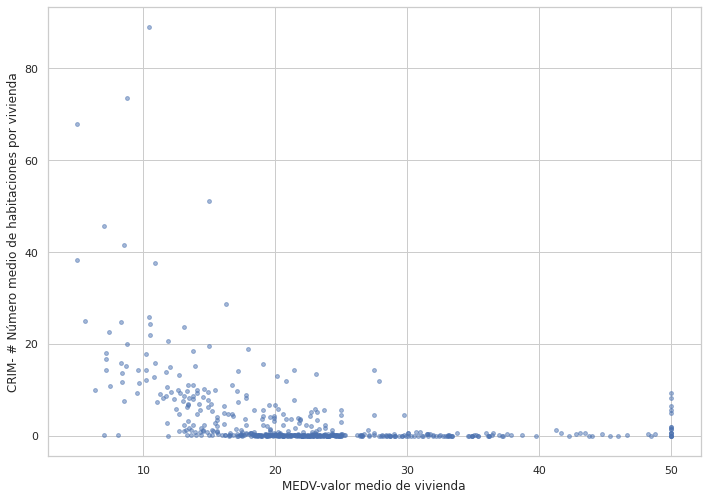

In [ ]:
X = boston['MEDV']
y = boston['CRIM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('CRIM- # Número medio de habitaciones por vivienda')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['CRIM']

### Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###ENTRENAMIENTO

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

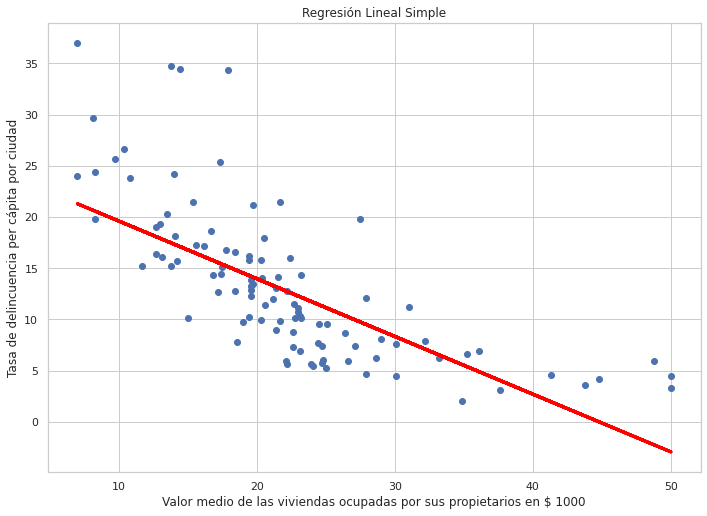


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Tasa de delincuencia per cápita por ciudad')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")


El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 7.99417565663069
R2 resultado es 0.15130948174423686




###MEDV VS ZN

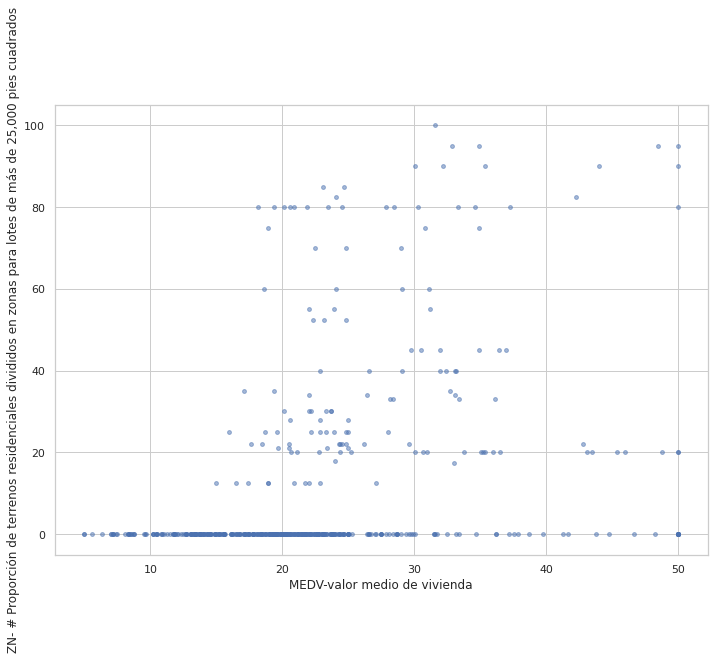

In [ ]:
X = boston['MEDV']
y = boston['ZN']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('ZN- # Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['ZN']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

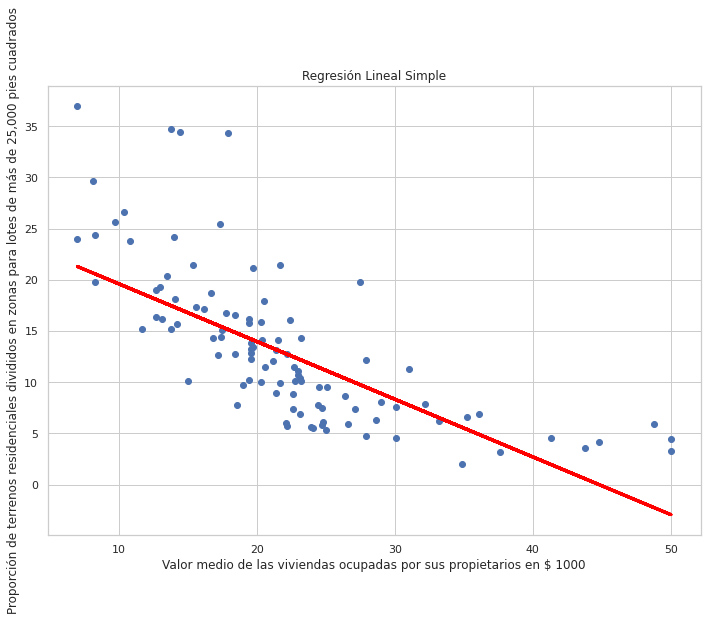


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")


El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 21.62684474703634
R2 resultado es 0.14892603046952102




###MEDV VS INDUS

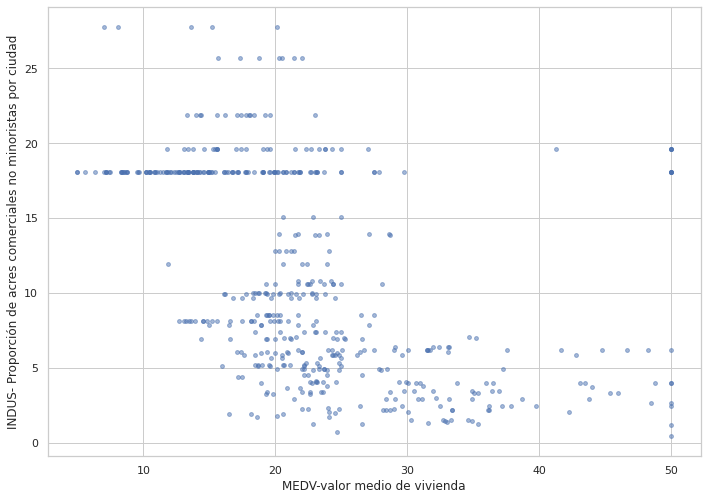

In [ ]:
X = boston['MEDV']
y = boston['INDUS']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('INDUS- Proporción de acres comerciales no minoristas por ciudad')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['INDUS']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

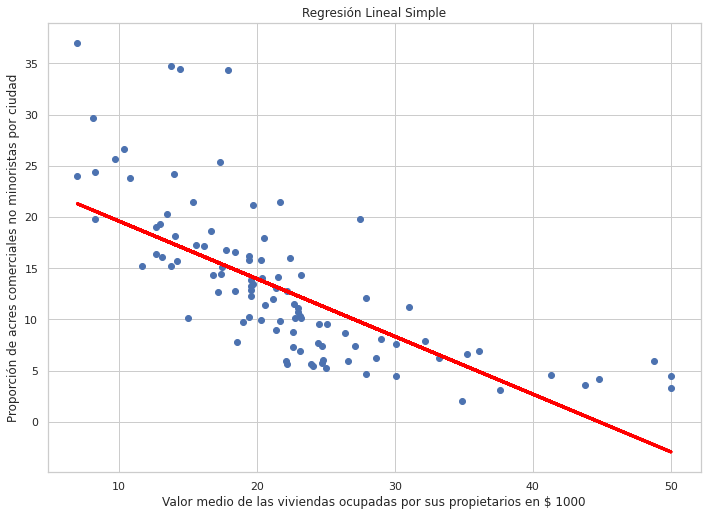


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Proporción de acres comerciales no minoristas por ciudad')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 5.919146974214109
R2 resultado es 0.22621218969347123




###MEDV VS CHAS

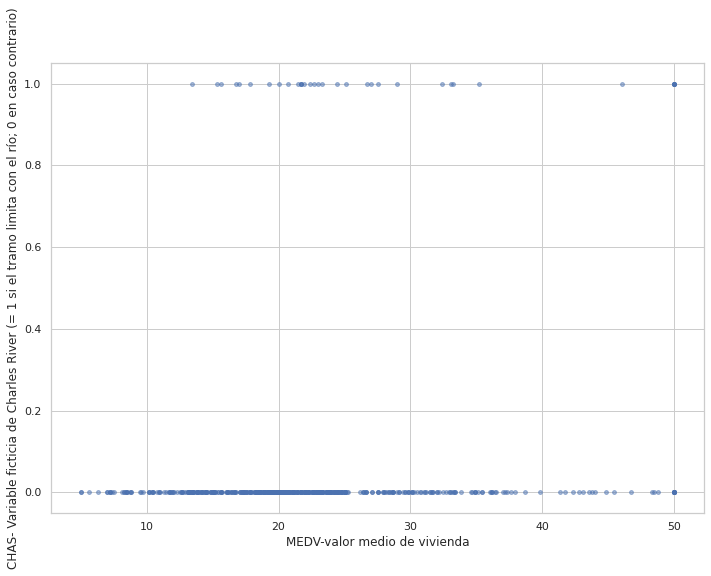

In [ ]:
X = boston['MEDV']
y = boston['CHAS']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('CHAS- Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['CHAS']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

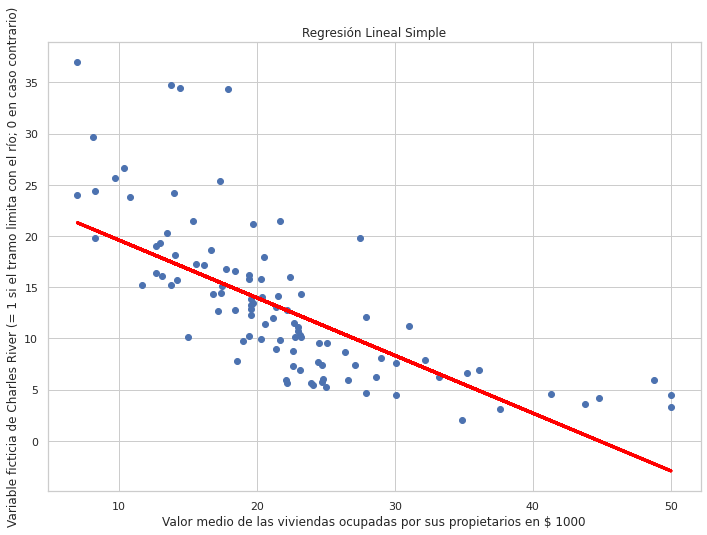


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.2505707801495858
R2 resultado es 0.026630566053890803




###MEDV VS NOX

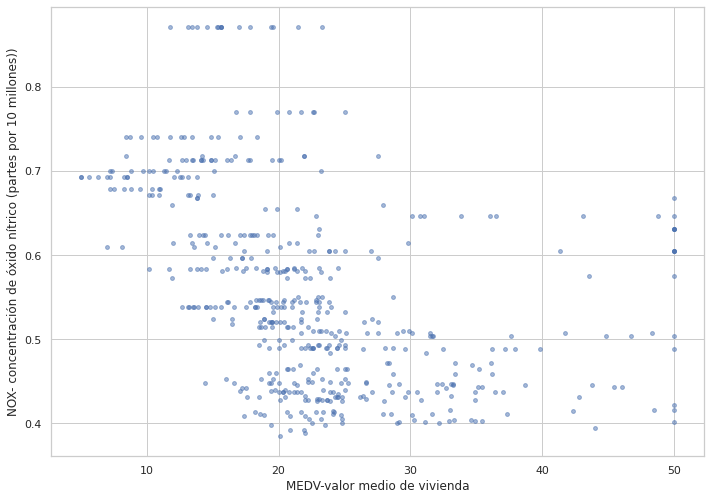

In [ ]:
X = boston['MEDV']
y = boston['NOX']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('NOX- concentración de óxido nítrico (partes por 10 millones))')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['NOX']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

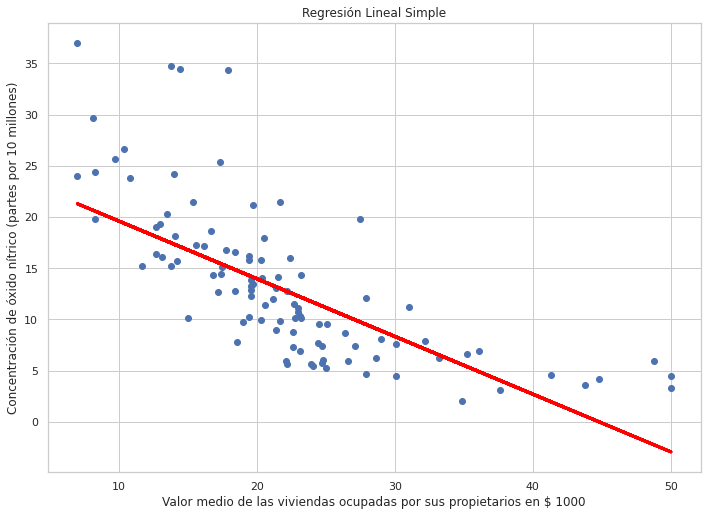


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Concentración de óxido nítrico (partes por 10 millones)')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.10361275550085308
R2 resultado es 0.1822820971691279




###MEDV VS AGE

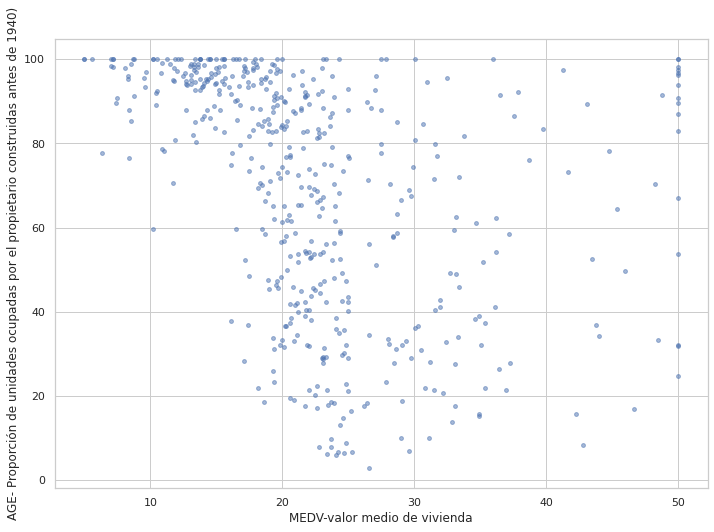

In [ ]:
X = boston['MEDV']
y = boston['AGE']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('AGE- Proporción de unidades ocupadas por el propietario construidas antes de 1940)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['AGE']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


###Evaluación del modelo

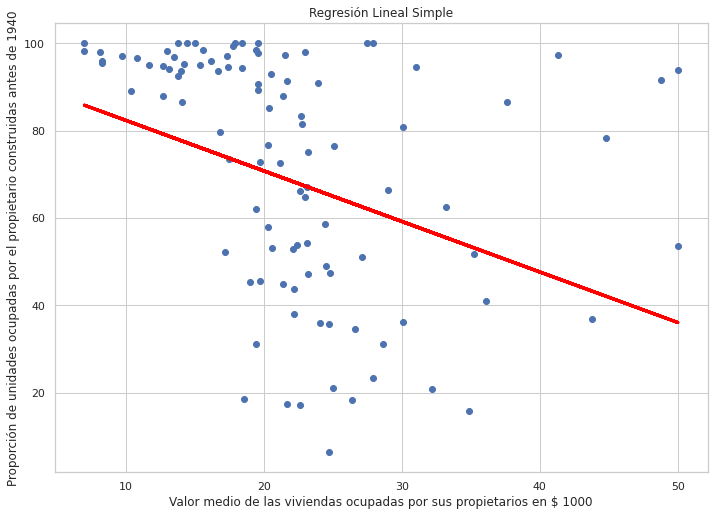


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.14343278560786088


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Proporción de unidades ocupadas por el propietario construidas antes de 1940')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 26.192874950599776
R2 resultado es 0.14343278560786088




###MEDV VS DIS

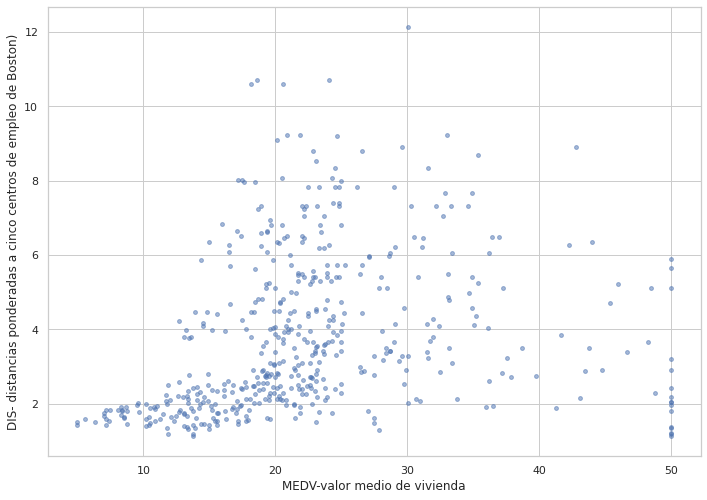

In [ ]:
X = boston['MEDV']
y = boston['DIS']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('DIS- distancias ponderadas a cinco centros de empleo de Boston)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['DIS']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

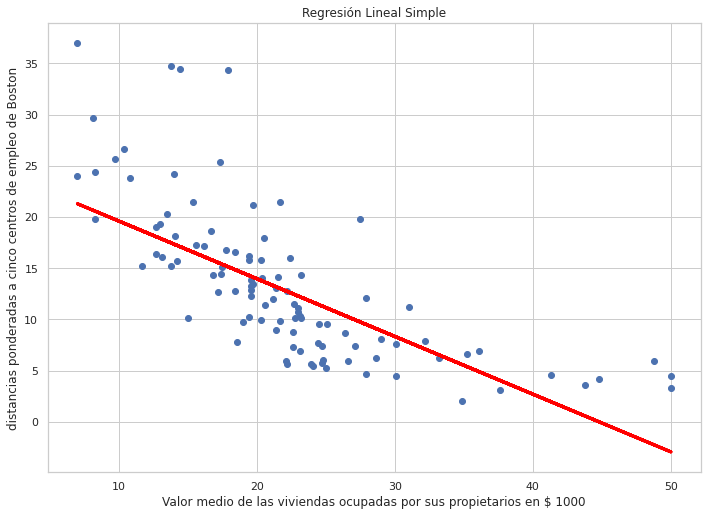


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('distancias ponderadas a cinco centros de empleo de Boston')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 1.9868476397994093
R2 resultado es 0.06403661597646704




###MEDV VS RAD

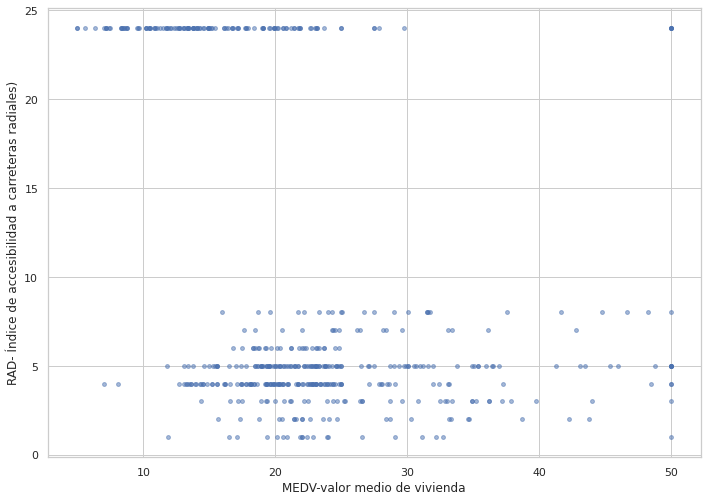

In [ ]:
X = boston['MEDV']
y = boston['RAD']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RAD- Índice de accesibilidad a carreteras radiales)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['RAD']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

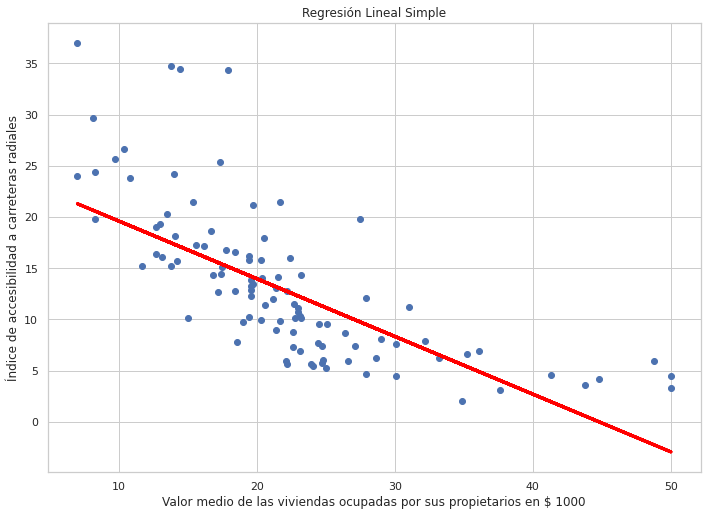


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Índice de accesibilidad a carreteras radiales')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 8.041839866259071
R2 resultado es 0.14327751929735832




###MEDV VS TAX

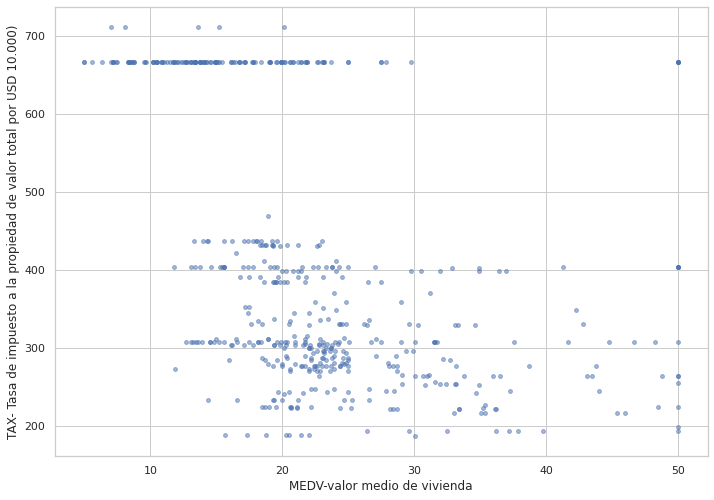

In [ ]:
X = boston['MEDV']
y = boston['TAX']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('TAX- Tasa de impuesto a la propiedad de valor total por USD 10.000)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['TAX']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

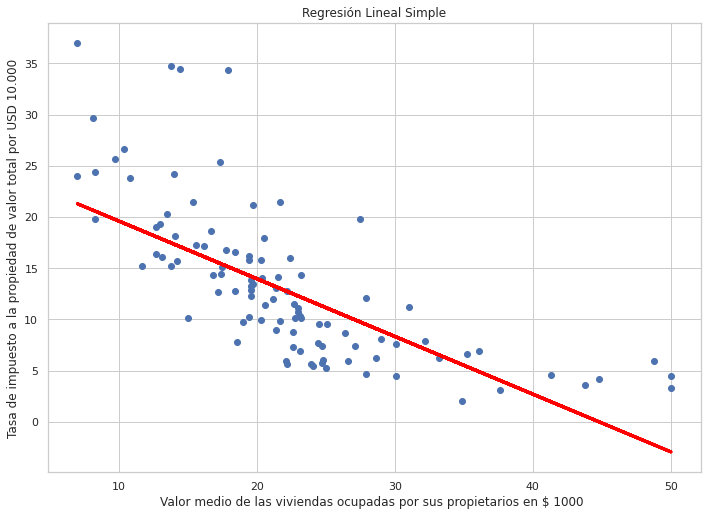


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 ')
plt.ylabel('Tasa de impuesto a la propiedad de valor total por USD 10.000')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 150.238639484459
R2 resultado es 0.20150464914201227




###MEDV VS PTRATIO

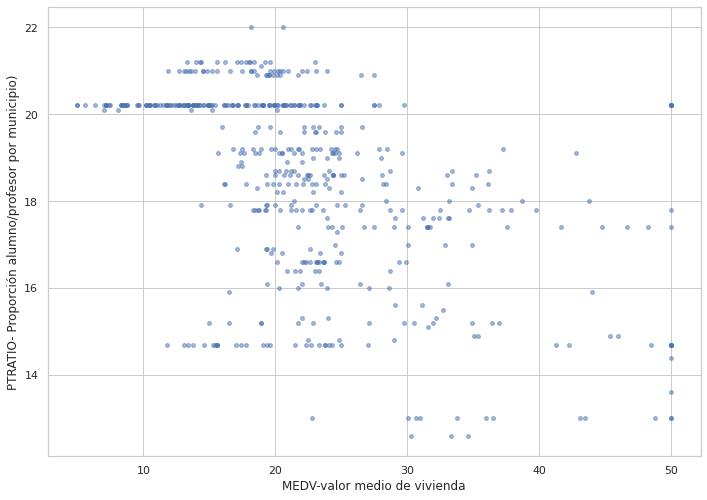

In [ ]:
X = boston['MEDV']
y = boston['PTRATIO']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('PTRATIO- Proporción alumno/profesor por municipio)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['PTRATIO']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

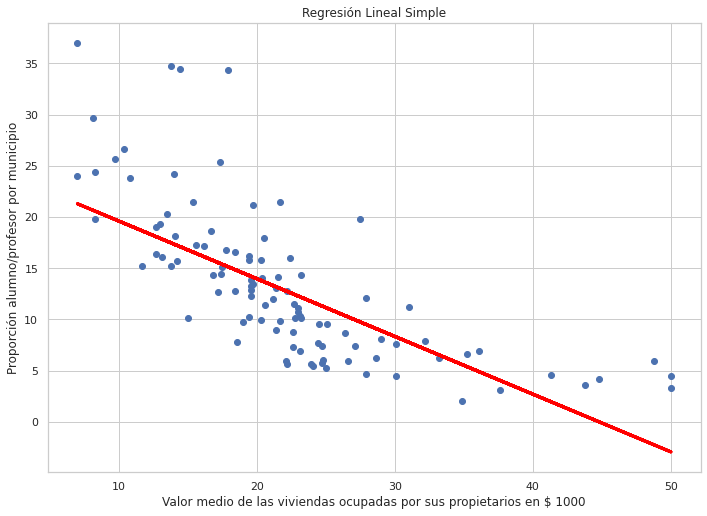


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('Proporción alumno/profesor por municipio')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 1.8837736991004848
R2 resultado es 0.26033288154359324




###MEDV VS B

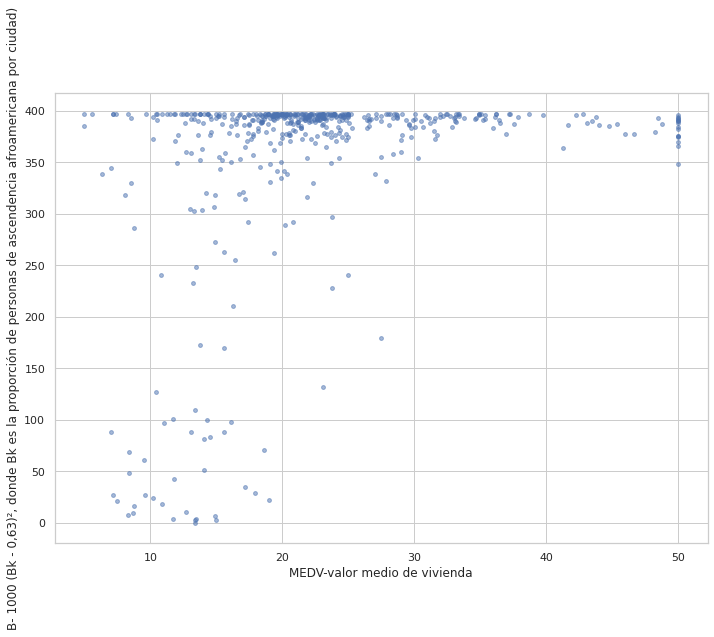

In [ ]:
X = boston['MEDV']
y = boston['B']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('B- 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad)')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['B']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Entrenando un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

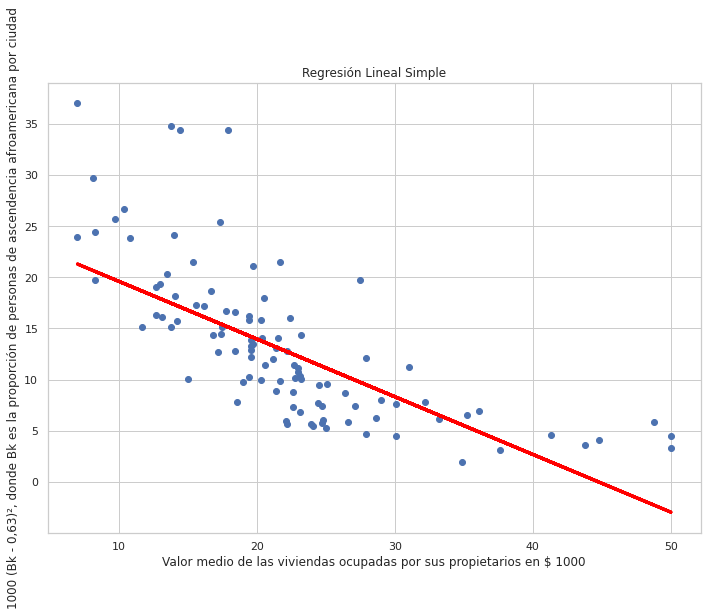


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.ylabel('1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 84.29882026834767
R2 resultado es 0.10160292155648964




###Graficando variables seleccionadas

#### MEDV vs RM

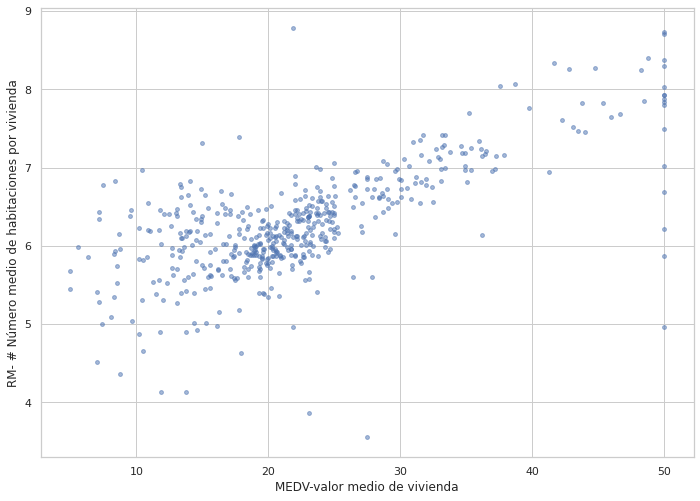

In [ ]:
X = boston['MEDV']
y = boston['RM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RM- # Número medio de habitaciones por vivienda')
plt.show()

###Preparación de los datos para el modelo

In [ ]:
X = pd.DataFrame(np.c_[boston['MEDV']], columns = ['MEDV'])
Y = boston['RM']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Dividir los datos en conjuntos de entrenamiento (70%) y pruebas (30%)


In [ ]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
##print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
##print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

###Dividir los datos en conjuntos de entrenamiento (60%) y pruebas (40%)


In [ ]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)
##print("x60%: "+str(X_train.shape) +", x40%: "+str(X_test.shape))
##print("y60%: "+str(Y_train.shape) +", y40%: "+str(Y_test.shape))

###Dividir los datos en conjuntos de entrenamiento (50%) y pruebas (50%)


In [ ]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)
##print("x50%: "+str(X_train.shape) +", x50%: "+str(X_test.shape))
##print("y50%: "+str(Y_train.shape) +", y50%: "+str(Y_test.shape))

###Entrenando al modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

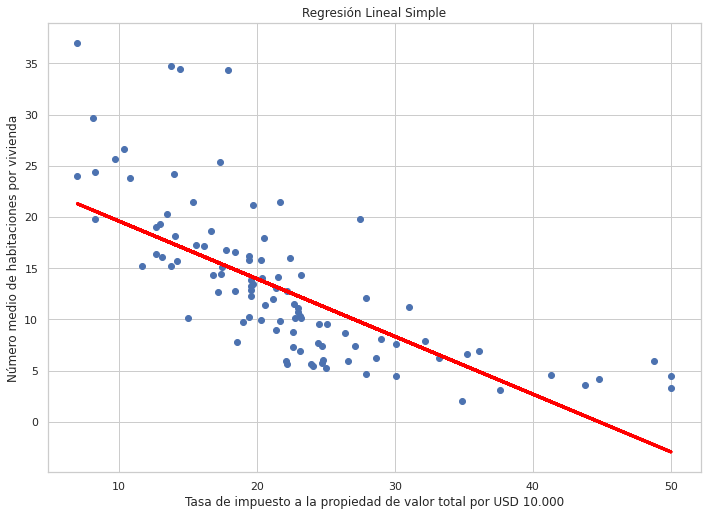


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.552301990803739


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['MEDV'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Tasa de impuesto a la propiedad de valor total por USD 10.000')
plt.ylabel('Número medio de habitaciones por vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.5206257938898936
R2 resultado es 0.43408977906372137


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 0.4418553230838273
R2 resultado es 0.642941668182245


####LSTAT vs MEDV


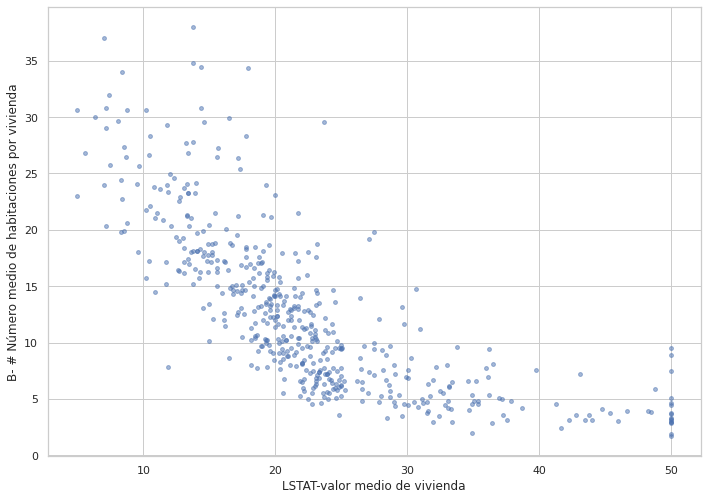

In [ ]:
X = boston['MEDV']
y = boston['LSTAT']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('LSTAT-valor medio de vivienda')
plt.ylabel('B- # Número medio de habitaciones por vivienda')
plt.show()

###Preparación de los datos para el modelo

In [221]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

###Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)



In [186]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
##print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
##print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))


x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


###Dividir los datos en conjuntos de entrenamiento (70%) y pruebas (30%)


In [222]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
##print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
##print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

x70%: (404, 2), x30%: (102, 2)
y70%: (404,), y30%: (102,)


###Dividir los datos en conjuntos de entrenamiento (60%) y pruebas (40%)


In [226]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
##print("x60%: "+str(X_train.shape) +", x40%: "+str(X_test.shape))
##print("y60%: "+str(Y_train.shape) +", y40%: "+str(Y_test.shape))

x60%: (404, 2), x40%: (102, 2)
y60%: (404,), y40%: (102,)


###Dividir los datos en conjuntos de entrenamiento (50%) y pruebas (50%)


In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)
print("x50%: "+str(X_train.shape) +", x50%: "+str(X_test.shape))
print("y50%: "+str(Y_train.shape) +", y50%: "+str(Y_test.shape))

x50%: (404, 2), x50%: (102, 2)
y50%: (404,), y50%: (102,)



###Entrenando un modelo de regresión lineal

In [230]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

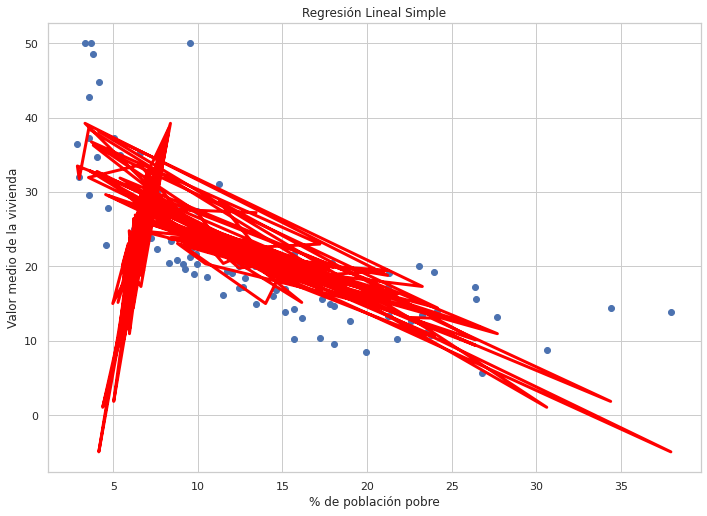


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.6409977103637292


In [231]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['LSTAT'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [232]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 5.483128760896386
R2 resultado es 0.6409977103637292


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 5.686209528389332
R2 resultado es 0.6245732517986632


### 8. Preparación de los datos para el entrenamiento del modelo

Regresión lineal:


> Y = mX + b


Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)
> Concatenamos las columnas que seleccionamos para entrenar:
X = LSTAT y RM
Y = MEDV



###RAD VS TAX

In [192]:
#Entrenando con 1 variable
##X=pd.DataFrame(np.c_[boston['LSTAT']],columns=['LSTAT'])
##X=pd.DataFrame(np.c_[boston['RM']], columns=['RM'])

#Entrenando con 2 variables en X
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
X = pd.DataFrame(np.c_[boston['RAD']], columns = ['RAD'])
Y = boston['TAX']

### 9. Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [193]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
##print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
##print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 1), x20%: (102, 1)
y80%: (404,), y20%: (102,)


### 9.1 Dividir los datos en conjuntos de entrenamiento (70%) y pruebas (30%)

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

x70%: (404, 1), x30%: (102, 1)
y70%: (404,), y30%: (102,)


### Dividir los datos en conjuntos de entrenamiento (60%) y pruebas (40%)

In [ ]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
##print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
##print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

### 9.2 Dividir los datos en conjuntos de entrenamiento (50%) y pruebas (50%)

In [ ]:
##from sklearn.model_selection import train_test_split

##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)
##print("x50%: "+str(X_train.shape) +", x50%: "+str(X_test.shape))
##print("y50%: "+str(Y_train.shape) +", y50%: "+str(Y_test.shape))

###10.entrenando un modelo de regresión lineal

In [197]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 11.Evaluación del modelo
Evaluamos el modelo utilizando RMSE y R2-score.


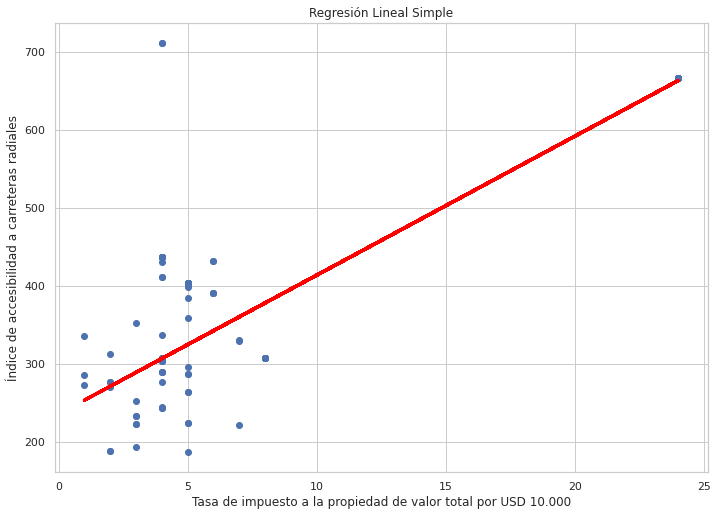


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.8469951184400273


In [198]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['RAD'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Tasa de impuesto a la propiedad de valor total por USD 10.000')
plt.ylabel('Índice de accesibilidad a carreteras radiales')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 65.76549445527681
R2 resultado es 0.8469951184400272


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 83.88628074962739
R2 resultado es 0.752905220762236
